# Samuel Watkins, 3032132676
---
# Final Project, AY250, Spring 2018
## Due Thursday, May 10, 5 PM

This is the testing script to run the DIDV analysis suite. Below is the project proposal that I submitted on Piazza.

> **Final Project Proposal**

>My project proposal is to create an analysis suite for my research group. My group runs transition edge sensor (TES) detectors that operate in the superconducting transition, where the dynamics are nonlinear (but can be linearized in the small signal limit). The small signal dynamics can be used to study the physical properties of the detectors, as well as to calculate the expected energy resolution from theory (which would not be in the scope of this analysis). 

>The analysis suite will use an already written autocutting algorithm (to cut out data that has pulses from photons or other particles hitting the detector), fit the complex impedance of the detector in frequency space, and generate plots to show the results. If I have the time, I would also like to combine this analysis suite with one that processes the noise of a flat trace (i.e. calculates the power spectral density). I would also like to use parallel processing in this, since we can have up to ~1000 data files to analyze at a time.

>We have some of these functions written up for fitting, but my idea is to vastly clean up the code/improve the comments, consolidate the various sources into one analysis suite, add the parallel processing to hopefully speed up the code by a fair amount, create nice plots, and find a good way of saving the data that isn't .pkl files (I think this would be .hdf5). This would draw on lectures about Numpy/Scipy for the math/fitting functions, Matplotlib for the plotting, Parallelism for the parallel computing, and the databases with regards to using HDF5.

>Let me know if this sounds okay, or if any of you have other questions about it! Thanks!

Import the needed packages to run the test script.

In [1]:
from DIDV import processDIDV
import matplotlib.pyplot as plt
import numpy as np
import h5py

%matplotlib inline

Set all of the necessary parameters and load the traces from an HDF5 file in the repository.

In [2]:
# Setting various parameters that are specific to the dataset
Rshunt = 5.0e-3
Rbias_SG = 20000.0
Rfb = 5000.0
loopgain = 2.4
ADCperVolt = 65536.0/2.0
fs = 625.0e3
sgFreq = 100.0
sgAmp = 0.009381 /Rbias_SG
drivergain = 4.0
Rp = 0.0060367199999999998
Rload = Rshunt+Rp
dRload = 0.0001
R0 = 0.075570107054005367
dR0 = 8.96383052e-04

convToAmps = Rfb * loopgain * drivergain * ADCperVolt

saveResults = True

# load the dataset
with h5py.File('example_traces.h5','r') as f:
    rawTraces = np.array(f["rawTraces"])

fileSaveName = "example_traces_data"

# set the priors information, for use the priors fitting
priors = np.zeros(7)
invpriorsCov = np.zeros((7,7))
priors[0] = Rload
priors[1] = R0
invpriorsCov[0,0] = 1.0/dRload**2
invpriorsCov[1,1] = 1.0/dR0**2
dt0=-18.8e-6

Run the processing package on the data.

In [3]:
print('Starting processing...')
savedData = processDIDV(rawTraces,priors=priors,invpriorsCov=invpriorsCov,timeOffset=0,
                        dt0=dt0,traceGain=convToAmps,sgFreq=sgFreq,sgAmp=sgAmp,
                        fs=fs,dutycycle=0.5,add180Phase=False,fit=True,autoCut=True,
                        pathSave='',fileStr=fileSaveName,makePlots=True,
                        saveResults=saveResults,R0=R0,dR0=dR0,Rp=Rp,dRp=dRload,Rsh=Rshunt)

print("Done!")

Starting processing...


General.py:87: RuntimeWarning: overflow encountered in exp
  dummyTemplate = (1.0-np.exp(-time/tau_risepulse))*np.exp(-time/tau_fallpulse)
General.py:87: RuntimeWarning: overflow encountered in multiply
  dummyTemplate = (1.0-np.exp(-time/tau_risepulse))*np.exp(-time/tau_fallpulse)
/galbadata/analysis/packages/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


Done!


Let's look at the generated plots to make sure it's working correctly

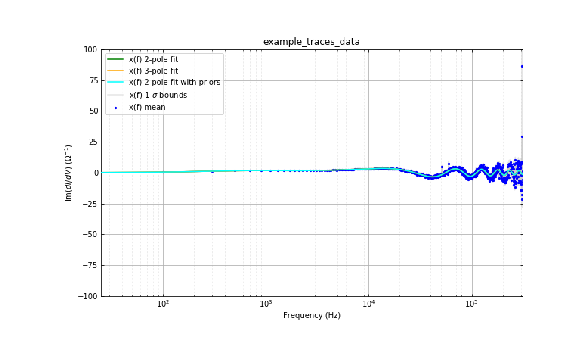

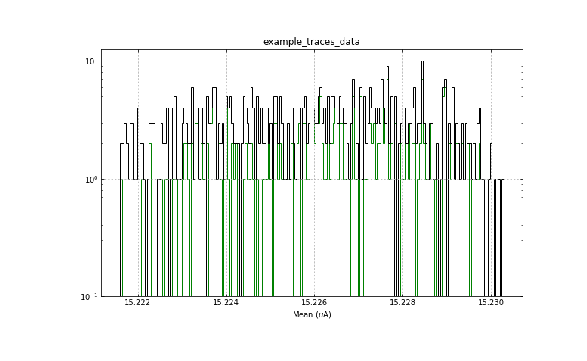

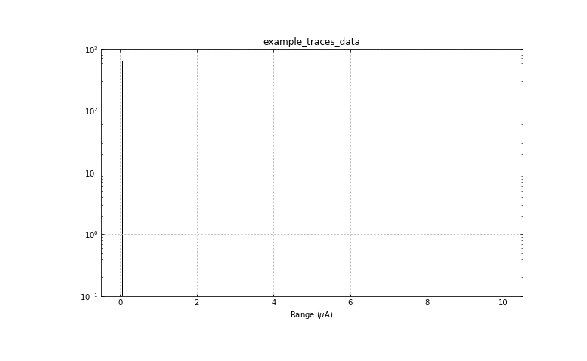

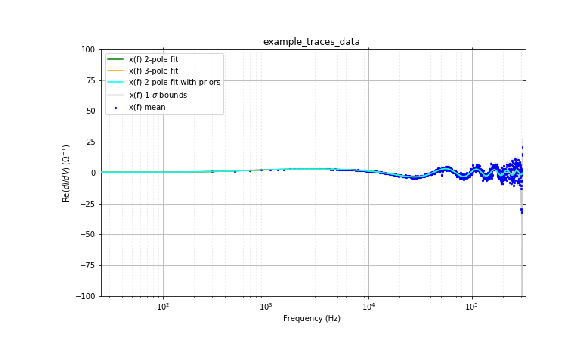

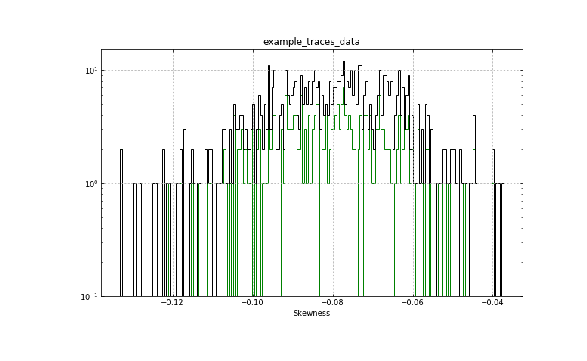

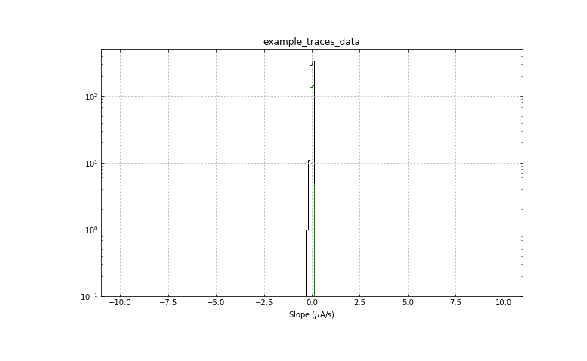

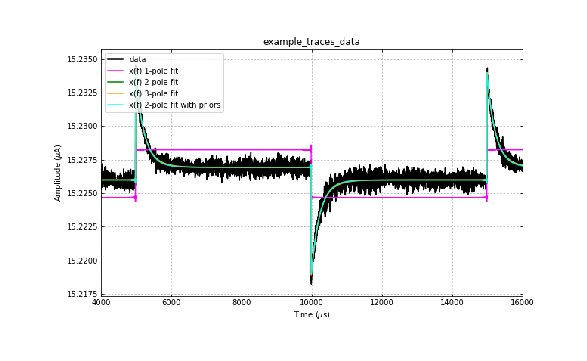

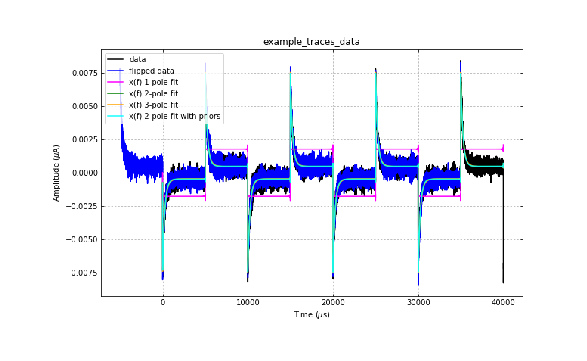

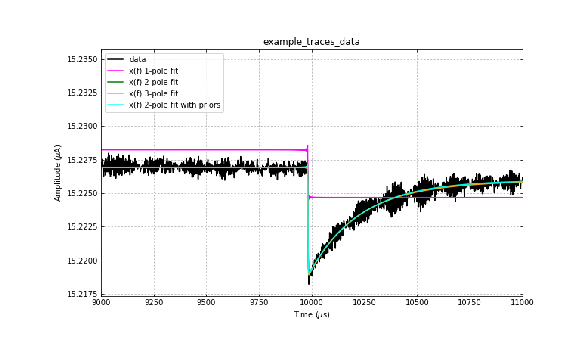

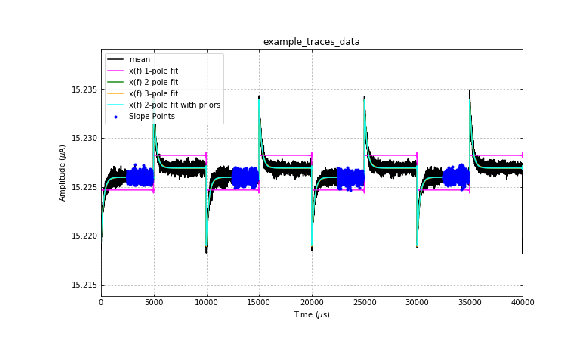

In [4]:
from glob import glob
from skimage.io import imread

images = sorted(glob("*.png"))
for img in images:
    fig,ax = plt.subplots(figsize=(10,6))
    imgArr = imread(img)
    ax.imshow(imgArr)
    plt.axis("off")